<h2 align=center> Fine-Tune BERT for Text Classification with TensorFlow</h2>

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping
from nltk import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud 
import nltk 
nltk.download('stopwords')
from nltk.stem import SnowballStemmer
%matplotlib inline  
import matplotlib
from matplotlib import colors
import matplotlib.pyplot as plt 
import seaborn as sb
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from collections import defaultdict
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import seaborn # make prettier graphs
import re
from gensim.models import LdaMulticore, TfidfModel, CoherenceModel
from gensim.corpora import Dictionary
import time # to know how long training took
import multiprocessing 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import csv
from textblob import TextBlob, Word, Blobber
import re
import string
import numpy as np
import matplotlib.pyplot as plt
from itertools import groupby
from nltk.corpus import stopwords
from keras.models import *
from keras.layers import *
from keras.callbacks import *
from tensorflow.python.keras import regularizers
from keras.optimizers import SGD
# K_fold cross validation.
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
import numpy
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.utils.multiclass import type_of_target
from sklearn.model_selection import GridSearchCV
from tensorflow.keras import activations 


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data2 = pd.read_csv("train.csv") 
data2.loc[data2.sentiment == "positive", 'sentiment'] = 2
data2.loc[data2.sentiment == "neutral", 'sentiment'] = 1
data2.loc[data2.sentiment == "negative", 'sentiment'] = 0
uniqueValues = data2['sentiment'].unique()

data2 = data2.drop(data2.columns[0], axis=1)
data2 = data2.drop(data2.columns[1], axis=1)
data2 = data2.rename({'sentiment': 'label'}, axis=1)  # new method

print('Unique elements in column "Tag" ')
print(uniqueValues)
data2[:2]

Unique elements in column "Tag" 
[1 0 2]


,text,label
0,"I`d have responded, if I were going",1
1,Sooo SAD I will miss you here in San Diego!!!,0


In [ ]:
df = pd.read_csv("labedldata2.csv",header=1)
df = df.drop(df.columns[0], axis=1)
print(df.shape)
df[:3]

(3999, 2)


,text,label
0,#COVID19 Maharashtra mulls imposing night curf...,1.0
1,#COVID19 Maharashtra mulls imposing night curf...,1.0
2,"Covid-19: PM's new vaccine target, and the spe...",2.0


In [ ]:
import spacy
def clean_text(text):
    
    text = text.lower()
    text = text.replace(':)','')
    text = text.replace(':(','')
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',text)
    text = re.sub('^rt', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('@\w+', '', text)
    text = re.sub('#\w+', '', text)


    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[\s]+', ' ', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'#([^\s]+)', r'\1', text)
    return text


pd.set_option('display.max_colwidth',None)

In [ ]:
def clean(text):
    #'''reduce text to lower-case lexicon entry'''
    lemmas = [token.lemma_ for token in nlp(text)] 
            #  if token.pos_ in {'NOUN', 'VERB', 'ADJ', 'ADV', 'PROPN'}]
    return ' '.join(lemmas)

In [ ]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  #text = re.sub(r"(.)\1+", "\\1", str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)


#lematization




nlp = spacy.load('en', disable=['parser', 'ner'])

In [ ]:
df = pd.read_csv("labedldata2.csv",header=1)
df = df.drop(df.columns[0], axis=1)
print(df.shape)
df[:3]

(3999, 2)


,text,label
0,#COVID19 Maharashtra mulls imposing night curfew in THESE districts as #coronavirus cases surge\n\n#COVID #Corona #Maharastra #MaharashtraCorona \n\nhttps://t.co/xZVxvpV1Fa,1.0
1,#COVID19 Maharashtra mulls imposing night curfew in THESE districts as #coronavirus cases surge\n\n#COVID #Corona #Maharastra #MaharashtraCorona \n\nhttps://t.co/xZVxvpV1Fa,1.0
2,"Covid-19: PM's new vaccine target, and the special effects livening up lockdown https://t.co/Te6UZEqEtE\n\n#Covid #Coronavirus",2.0


In [ ]:
df['text_cleaned'] = df['text'].apply(clean_text)
df['text_cleaned'] = df['text_cleaned'].apply(preprocess)
#df['text_cleaned'] = df['text_cleaned'].apply(clean_text)
df['text_cleaned'] = df['text_cleaned'].apply(str)
df['text_cleaned'] = df['text_cleaned'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
#df['text_cleaned'] = df['text_cleaned'].str.replace("[^a-zA-Z#]", " ")
df = df.replace(np.nan,1, regex=True)
df = df[df.label != 12]
df.dropna(subset = ["label"], inplace=True)
uniqueValues = df['label'].unique()
print('Unique elements in column "Tag" ')
print(uniqueValues)


df[:2]

Unique elements in column "Tag" 
[1. 2. 0.]


,text,label,text_cleaned
0,#COVID19 Maharashtra mulls imposing night curfew in THESE districts as #coronavirus cases surge\n\n#COVID #Corona #Maharastra #MaharashtraCorona \n\nhttps://t.co/xZVxvpV1Fa,1.0,maharashtra mulls imposing night curfew districts cases surge
1,#COVID19 Maharashtra mulls imposing night curfew in THESE districts as #coronavirus cases surge\n\n#COVID #Corona #Maharastra #MaharashtraCorona \n\nhttps://t.co/xZVxvpV1Fa,1.0,maharashtra mulls imposing night curfew districts cases surge


In [ ]:
#x1 = x1[['text','label']]
#x1 = x1.rename(columns={'label': 'tag'})
data2['text_cleaned'] =  data2['text'].apply(str)
data2['text_cleaned'] = data2['text_cleaned'].apply(clean_text)
data2['text_cleaned'] = data2['text_cleaned'].apply(preprocess)
#x['text_cleaned'] = x1['text_cleaned'].apply(clean_text)
data2['text_cleaned'] = data2['text_cleaned'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
data2['text_cleaned'] = data2['text_cleaned'].str.replace("[^a-zA-Z#]", " ")
data2[:2]

,text,label,text_cleaned
0,"I`d have responded, if I were going",1,responded going
1,Sooo SAD I will miss you here in San Diego!!!,0,sooo sad miss san diego


In [ ]:
uniqueValues = data2['label'].astype(float).unique()
print('Unique elements in column "Tag" ')
print(uniqueValues)
data2['label']= data2['label'].astype(float)




Unique elements in column "Tag" 
[1. 0. 2.]


In [ ]:
data2_ = data2[data2['label']==2]
data2__ = data2[data2['label']==0]
#data2___ = data2[data2['label']==1]


data2_ = data2_[:3000]
data2__ = data2__[:2000]
#data2___ = data2___[:2000]

data2__[:3]

,text,label,text_cleaned
1,Sooo SAD I will miss you here in San Diego!!!,0.0,sooo sad miss san diego
2,my boss is bullying me...,0.0,boss bullying
3,what interview! leave me alone,0.0,interview leave alone


In [ ]:
frames = [df,data2_,data2__]
result = pd.concat(frames)
#result = result.to_csv("alldata.csv")
result = result.reset_index()
print(data2.shape)
print(result.shape)
result[:3]

(27481, 3)
(8998, 4)


,index,text,label,text_cleaned
0,0,#COVID19 Maharashtra mulls imposing night curfew in THESE districts as #coronavirus cases surge\n\n#COVID #Corona #Maharastra #MaharashtraCorona \n\nhttps://t.co/xZVxvpV1Fa,1.0,maharashtra mulls imposing night curfew districts cases surge
1,1,#COVID19 Maharashtra mulls imposing night curfew in THESE districts as #coronavirus cases surge\n\n#COVID #Corona #Maharastra #MaharashtraCorona \n\nhttps://t.co/xZVxvpV1Fa,1.0,maharashtra mulls imposing night curfew districts cases surge
2,2,"Covid-19: PM's new vaccine target, and the special effects livening up lockdown https://t.co/Te6UZEqEtE\n\n#Covid #Coronavirus",2.0,pms new vaccine target special effects livening lockdown


In [ ]:
data = result.copy()
uniqueValues = data['label'].unique()
print('Unique elements in column "Tag" ')
print(uniqueValues)
data[:3]



count = data.groupby('label')['text_cleaned'].nunique()
print (count)

Unique elements in column "Tag" 
[1. 2. 0.]
label
0.0    2833
1.0    2554
2.0    3137
Name: text_cleaned, dtype: int64


In [ ]:
X = data.text_cleaned
Y = data.label

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(7198,)
(1800,)


The pretrained BERT model used in this project is [available](https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2) on [TensorFlow Hub](https://tfhub.dev/).

### Learning Objectives

### Contents



- **[Task 1]()**: Introduction to the Project.
- **[Task 2]()**: Setup your TensorFlow and Colab Runtime
- **[Task 3]()**: Download and Import the Quora Insincere Questions Dataset
- **[Task 4]()**: Create tf.data.Datasets for Training and Evaluation
- **[Task 5]()**: Download a Pre-trained BERT Model from TensorFlow Hub
- **[Task 6]()**: Tokenize and Preprocess Text for BERT
- **[Task 7]()**: Wrap a Python Function into a TensorFlow op for Eager Execution
- **[Task 8]()**: Create a TensorFlow Input Pipeline with `tf.data`
- **[Task 9]()**: Add a Classification Head to the BERT `hub.KerasLayer`
- **[Task 10]()**: Fine-Tune BERT for Text Classification
- **[Task 11]()**: Evaluate the BERT Text Classification Model

## Task 2: Setup your TensorFlow and Colab Runtime.

In [ ]:
!nvidia-smi

Mon Apr 12 05:40:19 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Install TensorFlow and TensorFlow Model Garden

In [ ]:
import tensorflow as tf
print(tf.version.VERSION)

2.4.1


In [ ]:
#!pip install -q tensorflow==2.3.0

In [ ]:
!git clone --depth 1 -b v2.3.0 https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 2650, done.
remote: Counting objects: 100% (2650/2650), done.
remote: Compressing objects: 100% (2311/2311), done.
remote: Total 2650 (delta 507), reused 1382 (delta 306), pack-reused 0
Receiving objects: 100% (2650/2650), 34.01 MiB | 35.25 MiB/s, done.
Resolving deltas: 100% (507/507), done.
Note: checking out '400d68abbccda2f0f6609e3a924467718b144233'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>



In [ ]:
# install requirements to use tensorflow/models repository
!pip install -Uqr models/official/requirements.txt
# you may have to restart the runtime afterwards

     |████████████████████████████████| 6.6MB 21.9MB/s 
     |████████████████████████████████| 225kB 48.6MB/s 
     |████████████████████████████████| 15.3MB 213kB/s 
     |████████████████████████████████| 9.9MB 46.1MB/s 
     |████████████████████████████████| 296kB 59.1MB/s 
     |████████████████████████████████| 102kB 13.3MB/s 
     |████████████████████████████████| 27.4MB 90kB/s 
     |████████████████████████████████| 174kB 54.7MB/s 
     |████████████████████████████████| 3.7MB 52.2MB/s 
     |████████████████████████████████| 706kB 48.5MB/s 
     |████████████████████████████████| 358kB 58.6MB/s 
     |████████████████████████████████| 1.2MB 45.2MB/s 
     |████████████████████████████████| 10.3MB 47.9MB/s 
     |████████████████████████████████| 37.6MB 81kB/s 
     |████████████████████████████████| 645kB 57.4MB/s 
     |████████████████████████████████| 3.0MB 46.2MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
     |████████████████████████████████| 81kB 10.3MB

## Task 3: Download and Import the Quora Insincere Questions Dataset

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import sys
sys.path.append('models')
from official.nlp.data import classifier_data_lib
from official.nlp.bert import tokenization
from official.nlp import optimization

In [ ]:
print("TF Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

TF Version:  2.4.1
Eager mode:  True
Hub version:  0.11.0
GPU is available


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split



In [ ]:
data = data.drop(['text','index'], axis = 1)
data.head(1)

KeyError: ignored

In [ ]:
data.shape

(8998, 2)

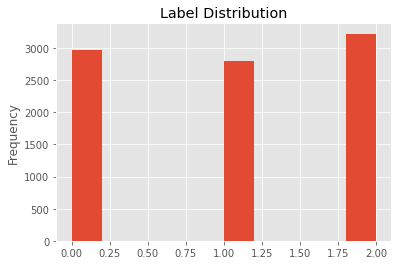

In [ ]:
data.label.plot(kind="hist", title ="Label Distribution")

## Task 4: Create tf.data.Datasets for Training and Evaluation

In [ ]:
X = data.text_cleaned
Y = data.label

train_df, remaining = train_test_split(data, train_size=0.80, random_state=42)
valid_df, _ = train_test_split(remaining, random_state=42)

print(train_df.shape)
print(valid_df.shape)

(7198, 2)
(1350, 2)


In [ ]:
count = valid_df.groupby('label')['text_cleaned'].nunique()
print (count)

label
0.0    441
1.0    394
2.0    478
Name: text_cleaned, dtype: int64


In [ ]:
valid_df["label"].values.shape

(1350,)

In [ ]:
with tf.device('/cpu:0'):
  train_data = tf.data.Dataset.from_tensor_slices((train_df["text_cleaned"].values,
                                            train_df["label"].values ))
  valid_data = tf.data.Dataset.from_tensor_slices((valid_df["text_cleaned"].values,
                                            valid_df["label"].values ))
  for text, label in train_data.take(2):
    print(text)
    print(label)



tf.Tensor(b'warhammer space marines officially announced luck gamers', shape=(), dtype=string)
tf.Tensor(0.0, shape=(), dtype=float64)
tf.Tensor(b'destruction jerusalem great controversy ellen whitethe secret terrorists', shape=(), dtype=string)
tf.Tensor(0.0, shape=(), dtype=float64)


In [ ]:
type(train_data)


tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

## Task 5: Download a Pre-trained BERT Model from TensorFlow Hub

In [ ]:
"""
Each line of the dataset is composed of the review text and its label
- Data preprocessing consists of transforming text to BERT input features:
input_word_ids, input_mask, segment_ids
- In the process, tokenizing the text is done with the provided BERT model tokenizer
"""

label_list = [0, 1, 2] # Label categories
max_seq_length = 64  # maximum length of (token) input sequences
train_batch_size = 32

# Get BERT layer and tokenizer:
# More details here: https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2

bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2",
                            trainable= True)
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)


In [ ]:
tokenizer.wordpiece_tokenizer.tokenize('Hi, how are you doing?')

['[UNK]', 'how', 'are', 'you', 'doing', '##?']

In [ ]:
#We need to convert to token ids
tokenizer.convert_tokens_to_ids(tokenizer.wordpiece_tokenizer.tokenize('Hi, how are you doing?'))

[100, 2129, 2024, 2017, 2725, 29632]

## Task 6: Tokenize and Preprocess Text for BERT

We'll need to transform our data into a format BERT understands. This involves two steps. First, we create InputExamples using `classifier_data_lib`'s constructor `InputExample` provided in the BERT library.

In [ ]:
# This provides a function to convert row to input features and label

def to_feature(text, label, label_list=label_list, max_seq_length=max_seq_length, tokenizer=tokenizer):
  example = classifier_data_lib.InputExample(guid=None,
                                             text_a= text.numpy(),
                                             text_b= None,
                                             label= label.numpy())
  feature = classifier_data_lib.convert_single_example(0, example, label_list, max_seq_length,tokenizer)
  return (feature.input_ids, feature.input_mask, feature.segment_ids, feature.label_id )
  
  

## Task 7: Wrap a Python Function into a TensorFlow op for Eager Execution

In [ ]:
def to_feature_map(text, label):
  input_ids, input_mask, input_type_ids, label_id = tf.py_function(to_feature,
                                                                inp = [text, label],
                                                                Tout = [tf.int32,
                                                                        tf.int32,
                                                                        tf.int32,
                                                                        tf.int32])
  input_ids.set_shape([max_seq_length])
  input_mask.set_shape([max_seq_length])
  input_type_ids.set_shape([max_seq_length])
  label_id.set_shape([])

  x= {
      'input_word_ids':input_ids,
      'input_mask' : input_mask,
      'input_type_ids' : input_type_ids,

  }
  return (x, label_id)

  
  

## Task 8: Create a TensorFlow Input Pipeline with `tf.data`

drop remainder forces the batch size to be constant. If it is not enabled, then the last minibatch will possibly be smaller than the batch size, thus the batch size is not a constant, and thus the shape cannot be determined statically (what you are seeing).

Imagine a dataset with 33 elements. If you batch with batch_size 32, then the minibatch sizes are 32 and 1. Drop remainder simply discards the smaller minibatch to fix this edge case, which only leaves the first minibatch of size 32.

In [ ]:
with tf.device('/cpu:0'):
  train_data = (train_data.map(to_feature_map,
                               num_parallel_calls = tf.data.experimental.AUTOTUNE)
  .shuffle(1000)
  .batch(32, drop_remainder = False)
  .prefetch(tf.data.experimental.AUTOTUNE))
 

 
  valid_data = (valid_data.map(to_feature_map,
                               num_parallel_calls = tf.data.experimental.AUTOTUNE)
  .batch(32, drop_remainder = False)
  .prefetch(tf.data.experimental.AUTOTUNE))
  

The resulting `tf.data.Datasets` return `(features, labels)` pairs, as expected by [`keras.Model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit):

In [ ]:
# train data spec
train_data.element_spec

({'input_mask': TensorSpec(shape=(None, 64), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(None, 64), dtype=tf.int32, name=None),
  'input_word_ids': TensorSpec(shape=(None, 64), dtype=tf.int32, name=None)},
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

In [ ]:
# valid data spec
valid_data.element_spec

({'input_mask': TensorSpec(shape=(None, 64), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(None, 64), dtype=tf.int32, name=None),
  'input_word_ids': TensorSpec(shape=(None, 64), dtype=tf.int32, name=None)},
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

## Task 9: Add a Classification Head to the BERT Layer

In [ ]:
# Building the model
def create_model():
  input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                       name="input_word_ids")
  input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                   name="input_mask")
  input_type_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                    name="input_type_ids")
  
  pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, input_type_ids])

  drop = tf.keras.layers.Dropout(0.5)(pooled_output)
  output = tf.keras.layers.Dense(3, activation='softmax',name = "output")(drop)

  model = tf.keras.Model(
      inputs = {
          'input_word_ids':input_word_ids,
          'input_mask' : input_mask,
          'input_type_ids' : input_type_ids},
           outputs = output)
  return model
  

## Task 10: Fine-Tune BERT for Text Classification

In [ ]:

model = create_model()

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 2e-5),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()])
model.summary()


Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 64)]         0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 64)]         0                                            
__________________________________________________________________________________________________
input_type_ids (InputLayer)     [(None, 64)]         0                                            
__________________________________________________________________________________________________
keras_layer_5 (KerasLayer)      [(None, 768), (None, 109482241   input_word_ids[0][0]             
                                                                 input_mask[0][0]           

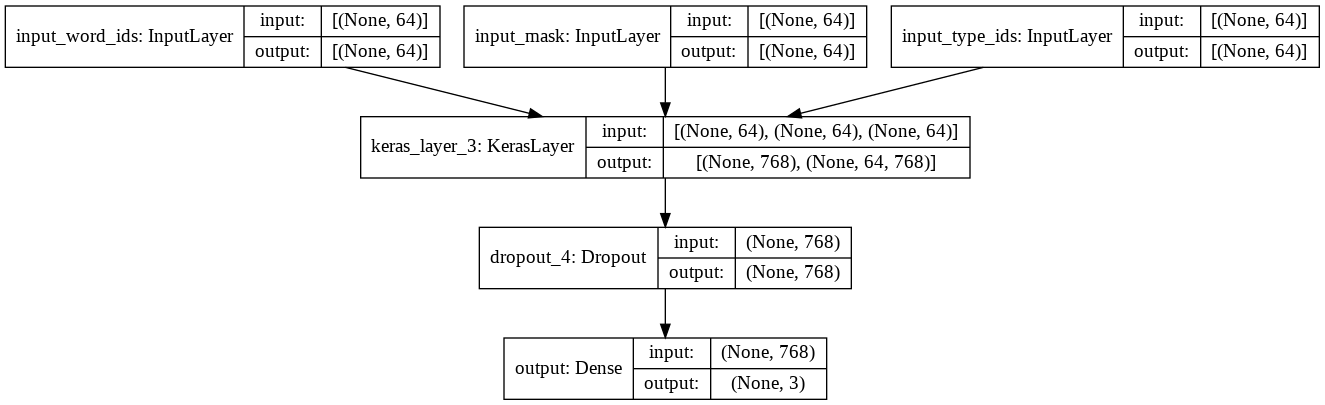

In [ ]:
tf.keras.utils.plot_model(model= model, show_shapes=True)

In [ ]:
# Train model
epochs = 3
history = model.fit(train_data,
    validation_data = valid_data,
    epochs = epochs,
    verbose = 1)

Epoch 1/3
225/225 [==============================] - 111s 437ms/step - loss: 0.9582 - sparse_categorical_accuracy: 0.5412 - val_loss: 0.5089 - val_sparse_categorical_accuracy: 0.8000
Epoch 2/3
225/225 [==============================] - 98s 433ms/step - loss: 0.4976 - sparse_categorical_accuracy: 0.8045 - val_loss: 0.5522 - val_sparse_categorical_accuracy: 0.7963
Epoch 3/3
225/225 [==============================] - 98s 434ms/step - loss: 0.3554 - sparse_categorical_accuracy: 0.8605 - val_loss: 0.5857 - val_sparse_categorical_accuracy: 0.8126


## Task 11: Evaluate the BERT Text Classification Model

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

In [ ]:
!pip uninstall matplotlib
!pip install matplotlib==3.1.3

Uninstalling matplotlib-3.4.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.4.1-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.4.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.4.1
     |████████████████████████████████| 13.1MB 244kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


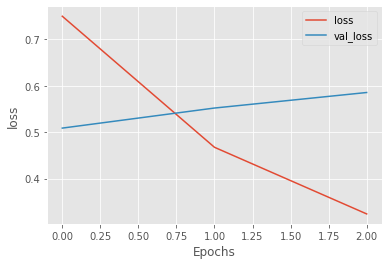

In [ ]:
import matplotlib
plot_graphs (history,'loss')

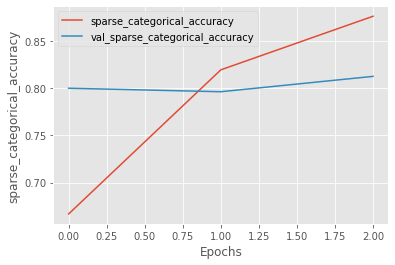

In [ ]:
import matplotlib
plot_graphs (history,'sparse_categorical_accuracy')

In [ ]:
valid_df.shape

(1350, 2)

In [ ]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
valid_data

<PrefetchDataset shapes: ({input_word_ids: (None, 64), input_mask: (None, 64), input_type_ids: (None, 64)}, (None,)), types: ({input_word_ids: tf.int32, input_mask: tf.int32, input_type_ids: tf.int32}, tf.int32)>

In [ ]:
preds = model.predict(valid_data)
get_label=np.argmax(preds,axis=1)
get_label

array([0, 0, 1, ..., 1, 0, 0])

In [ ]:
valid_label=valid_df.label.values
valid_label

array([0., 0., 1., ..., 1., 0., 2.])

Confusion matrix, without normalization
[[378  39  37]
 [ 74 295  45]
 [ 38  20 424]]


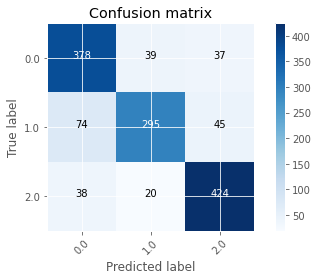

In [ ]:
plt.style.use('ggplot')
cnf_matrix = confusion_matrix(valid_label, get_label,labels=[0, 1, 2])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0.0', '1.0', '2.0'],
                      title='Confusion matrix')

In [ ]:
sample_example = ["i feel good", "i am not good", "covid"]
test_data = tf.data.Dataset.from_tensor_slices((sample_example, [0]*len(sample_example)))
test_data = (test_data.map(to_feature_map).batch(1))
preds = model.predict(test_data)
#treshhold = #between 0 and 1 and 2

In [ ]:
preds

array([[5.47e-03, 5.97e-04, 9.94e-01],
       [9.94e-01, 2.76e-03, 3.13e-03],
       [1.73e-02, 9.74e-01, 8.78e-03]], dtype=float32)

In [ ]:
np.argmax(preds,axis=1)

array([2, 0, 1])